# Problem of parametrical programming

In [10]:
from numpy import *
from scipy import optimize
import time 
import math  
import matplotlib.pyplot as plt

Солвер без модулей:

In [ ]:
def solver(x, tau, consts_params, first_params, second_params):
    solver = zeros([4])#numpy zeroes array
    solver[0] = consts_params[0]+first_params[0]*abs(x[0])+second_params[0]*abs(x[1])-tau*math.log(abs(x[2]))
    solver[1] = consts_params[1]+first_params[1]*abs(x[0])+second_params[1]*abs(x[1])-tau*math.log(abs(x[3]))
    solver[2] = consts_params[2]+first_params[2]*abs(x[2])+second_params[2]*abs(x[3])+tau*math.log(abs(x[0]))
    solver[3] = consts_params[3]+first_params[3]*abs(x[2])+second_params[3]*abs(x[3])+tau*math.log(abs(x[1]))
    return solver


Солвер с модулями:

In [3]:
def solver_noabs(x, tau, consts_params, first_params, second_params):
    solver_noabs = zeros([4])#numpy zeroes array
    solver_noabs[0] = consts_params[0]+first_params[0]*x[0]+second_params[0]*x[1]-tau*math.log(x[2])
    solver_noabs[1] = consts_params[1]+first_params[1]*x[0]+second_params[1]*x[1]-tau*math.log(x[3])
    solver_noabs[2] = consts_params[2]+first_params[2]*x[2]+second_params[2]*x[3]+tau*math.log(x[0])
    solver_noabs[3] = consts_params[3]+first_params[3]*x[2]+second_params[3]*x[3]+tau*math.log(x[1])
    return solver_noabs

Решение методом Крылова:

In [14]:
taus = []
nev = []
#x=array([1,1,1,1])
x_isk = [3, 0, 0,2]
x0 = array([2.995, 0.001, 0.001, 1.995])
for i in range(0, 120):
    tau = i/1000
    #print(tau)
    sol = optimize.root(solver,x0, method='krylov', args = (tau, [-6,-6,-4, -1], [1,2,1,2], [2,1,2,1]))
    emperic = sol.x
    nevyaz = (abs(emperic[0])-x_isk[0])**2+(abs(emperic[1])-x_isk[1])**2+(abs(emperic[2])-x_isk[2])**2+(abs(emperic[3])-x_isk[3])**2
    taus.append(tau)
    nev.append(nevyaz)
    #print('Krylov method iteration = ',sol.nit, tau, nevyaz)
    #print(r"$\tau:$", tau)
    #print("Невязка:", nevyaz)
    #print("Значения переменных", emperic)


Text(0, 0.5, 'Невязка')

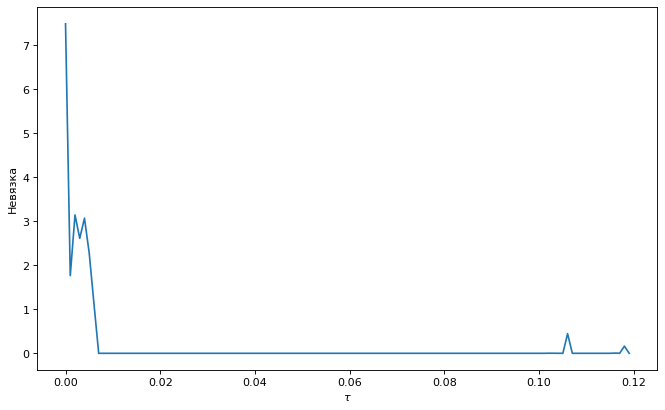

In [15]:
fig = plt.figure(figsize=(10, 6), dpi=80)
ax = fig.add_subplot(1, 1, 1)
ax.plot(taus, nev)
plt.xlabel(r'$\tau$')
plt.ylabel("Невязка")


Нормальная система, при решении не заходит в нулевую область:

Метод Ньютона:

In [123]:
from numpy import*
import time 
def jacobian(f, x):
         h = 1.0e-4
         n = len(x)
         Jac = zeros([n,n])
         f0 = f(x)
         for i in arange(0,n,1):
                  tt = x[i]
                  x[i] = tt + h
                  f1= f(x)
                  x[i] = tt
                  Jac [:,i] = (f1 - f0)/h
         return Jac, f0
def newton(f, x, tol=1.0e-9):
         iterMax = 50
         for i in range(iterMax):
                  Jac, fO = jacobian(f, x)
                  if sqrt(dot(fO, fO) / len(x)) < tol:
                           return x, i                 
                  dx = linalg.solve(Jac, fO)
                  x = x - dx
         print ("Too many iterations for the Newton method")
n=100

x=array([1,1,1,1])
consts_params=[-6, -6, -2, -3]
first_params=[1,2,1,2]
second_params=[2,1,2,1]
x0 = array([1, 1, 1, 1])
x, iter = newton(solver, x0)
print ('Solution:\n', x)
print ('Newton iteration = ', iter)
print('Solution:\n', sol.x)
print('Krylov method iteration = ',sol.nit)

LinAlgError: Singular matrix